In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import classification_report,plot_roc_curve

In [107]:
%matplotlib inline

## Model training and Improvement

In [108]:
income_dataset = pd.read_csv('adult.csv',na_values='?')

income_dataset = income_dataset.dropna(axis = 0)
income_dataset


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [109]:
income_attributes = income_dataset.drop(columns='income')
income_classes = income_dataset['income']

In [110]:
income_attributes.shape

(45222, 14)

In [111]:
income_classes.shape

(45222,)

In [112]:
income_attributes.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
dtype: object

In [113]:
income_attributes = pd.get_dummies(income_attributes,drop_first=True)

In [114]:
income_attributes.dtypes.unique()

array([dtype('int64'), dtype('uint8')], dtype=object)

In [115]:
scaler = MinMaxScaler()
income_attributes_scaled = scaler.fit_transform(income_attributes)

In [116]:
logistic_regression = LogisticRegression(C=1e9)
logistic_regression.fit(income_attributes_scaled,income_classes)
logistic_regression.score(income_attributes_scaled,income_classes)

c:\Users\as\anaconda3\envs\baseREC\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8496749369775772

In [117]:
for c in [1e-5,0.01,1,10,1e3,1e6,1e9]:
    logistic_regression = LogisticRegression(C=c)
    logistic_regression.fit(income_attributes_scaled,income_classes)
    print('C->',c, logistic_regression.score(income_attributes_scaled,income_classes))

C-> 1e-05 0.7521560302507629
C-> 0.01 0.832426694971474


c:\Users\as\anaconda3\envs\baseREC\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C-> 1 0.8484587147848393


c:\Users\as\anaconda3\envs\baseREC\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C-> 10 0.8496970501083544


c:\Users\as\anaconda3\envs\baseREC\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C-> 1000.0 0.8497412763699085


c:\Users\as\anaconda3\envs\baseREC\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C-> 1000000.0 0.8496749369775772
C-> 1000000000.0 0.8496749369775772


c:\Users\as\anaconda3\envs\baseREC\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [118]:
income_classes.value_counts()/len(income_classes)

<=50K    0.752156
>50K     0.247844
Name: income, dtype: float64

## Model training process

In [119]:
from sklearn.model_selection import train_test_split
income_dataset = pd.read_csv('adult.csv',na_values='?')


income_dataset


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [120]:
income_attributes = income_dataset.drop(columns = 'income')
income_output = income_dataset['income']

In [121]:
income_attributes= pd.get_dummies(income_attributes,drop_first=True)
income_attributes = MinMaxScaler().fit_transform(income_attributes)

In [122]:
income_attributes.shape

(48842, 97)

In [123]:
income_attributes_train, income_attributes_test, output_train, output_test = train_test_split(
    income_attributes,
    income_output,
    test_size = 0.2,
    random_state = 42,
    stratify =income_output  )

In [124]:
income_attributes_train.shape , income_attributes_test.shape,output_train.shape, output_test.shape

((39073, 97), (9769, 97), (39073,), (9769,))

In [129]:
logistic_regression = LogisticRegression(C=0.001)
logistic_regression.fit(income_attributes_train,output_train)
logistic_regression.score(income_attributes_test,output_test )

0.8239328488074521

In [130]:
output_train.value_counts()/len(output_train)

<=50K    0.76073
>50K     0.23927
Name: income, dtype: float64

In [131]:
print(classification_report(output_test,logistic_regression.predict(income_attributes_test)))

              precision    recall  f1-score   support

       <=50K       0.83      0.97      0.89      7431
        >50K       0.79      0.36      0.50      2338

    accuracy                           0.82      9769
   macro avg       0.81      0.67      0.69      9769
weighted avg       0.82      0.82      0.80      9769



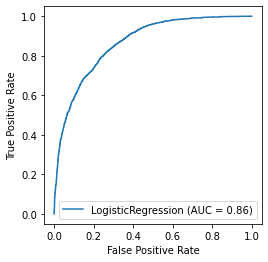

In [134]:
plot_roc_curve(logistic_regression,income_attributes_test,output_test)
plt.gca().set_aspect('equal')

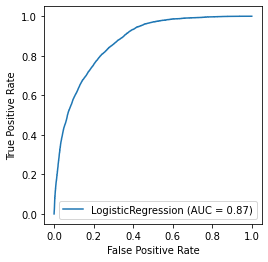

In [135]:
plot_roc_curve(logistic_regression,income_attributes_train,output_train)
plt.gca().set_aspect('equal')